In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [13]:
sns.set_style('whitegrid')

In [14]:
train = pd.read_csv('titanic_train.csv')

In [15]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
#It looks like we have a passenger survive column which notice it's a 0 or 1 so 0 if they did not survive 1 if they did survive
#P class which is the passenger class so the passengers can be in first class second class or third class
#There is also the name of the passenger the sex or gender the passenger of the string male or female
#The age of the passenger if they happen to know it.
#And then this SibSp that indicates the number of siblings or spouses aboard 
#and then Parch indicates the number of parents children aboard.
#And then there's a ticket number a passenger fare how much they paid for their ticket.
#There is cabin which is the cabin they were in If it's known
# then embarked and it's a port of impartation so C for Cherbourg,Q for Queenstown and S for Southampton.


In [17]:
#Now a lot of times you're going to have missing data.
#We're going to go ahead and do as you see Born to create a simple heat map to see where we're missing most of the data

In [18]:
train.isnull()
#Famse-> Is Not Null
#True->is Null
#	PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
#0	False	False	False	False	False	False	False	False	False	False	True	Fals

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

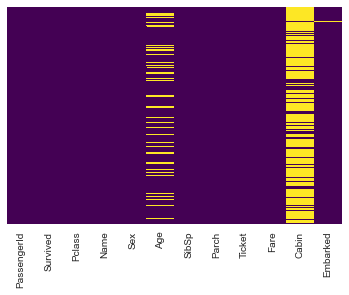

In [19]:
#I can actually make a heat map so I'm going to say this and I say sns.heatMap()and then I'm

#yticklabels=False't get a bunch of tick labels.

#cbar =False because we're not doing an actual color bar.

#cmap='viridis' to chnage the color.


#I've created a heat map of those boolean values those true and false statements and due to this.
#map does color mapping every yellow dash here basically stands for a true point where true it was null
#So we can just glimps now order data from a very far bird's eye view and check out that yes we're missing

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# some age information are missing, a lot of Cabane information and we're missing just essentially one
# row of embarked 

# roughly about 20 percent of that age data is missing and the proportion of age missing
# is likely small enough for a reasonable replacement of some form of imputation 

# meaning I can actually use the knowledge of the other columns to fill in reasonable values for that age column.


# Looking at the cabin column however it looks like we're just missing too much of that data to do something useful with it at a basic level.
#We're going to go ahead and probably drop this later or change it to send up some other feature like Cabane known 1 or 0. 

In [21]:
# First thing I want to do is just get a count of who survived who didn't survive.
# for classification problem It's always a good idea just to see the ratio of the actual target labels.
# Now we can do this for simple counterplot.

<AxesSubplot:xlabel='Survived', ylabel='count'>

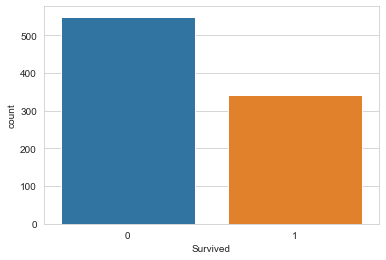

In [22]:
#going to just go ahead and set x to the survivors column
#set my data to train.
sns.countplot(x='Survived',data=train)

In [23]:
#And here he can see  quite a few more people that did not survive versus one which is survived
#But it looks like around 550 of these passengers in their dataset did not survive.350 Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

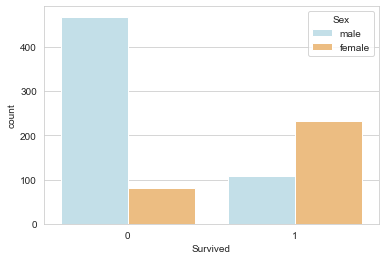

In [24]:
#hue='Sex' and this is going to add some coloring so it can actually tell by gender the survival rates.
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdYlBu_r')

In [25]:
# looking at this plot now I can really tell there's a trend here.
# It looks like people that did not survive were much more likely to be male and people that did survive
# were almost about twice as likely to be female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

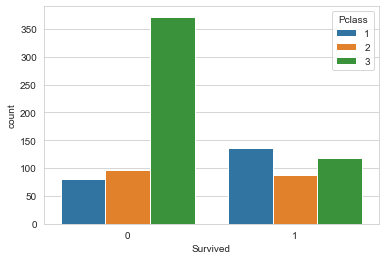

In [26]:
#hue='Pclass' continue exploring the data by changing this hue to the passenger class.
sns.countplot(x='Survived',data=train,hue='Pclass')

In [27]:
#Again looking at this we can kind of tell the trends here on survived versus not survived.

#It looks like the people who did not survive were overwhelmingly part of the third class or the lowest
#class that was the cheapest to get onto.
#And it looks like more or less the people that did survive were leaning a little more towards the higher classes 1 and 2.

In [28]:
# Let's go ahead and just get an idea of the age of people on the Titanic to do that.
# I can go ahead and do it using Distribution type plot.

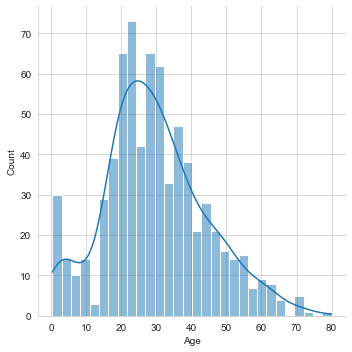

In [29]:
#displot(train["Age"] age column.Remember this plot just takes in an array of values.
#And for now I'll go ahead and say drop N.A. since I don't want to have those na messing up my distribution plot.


sns.displot(train["Age"].dropna(), kde=True,bins=30)

In [30]:
#what appears to be almost by modal distribution where you have quite a few young passengers towards between ages
#0 and 10. So there's quite a few children in that zone.So it is quite maybe skewed towards younger passengers.

#after that you can see it starts to get an average age towards maybe 20 or 30 somewhere around there.

#And as the older you get the less representation you have on board.

<AxesSubplot:ylabel='Frequency'>

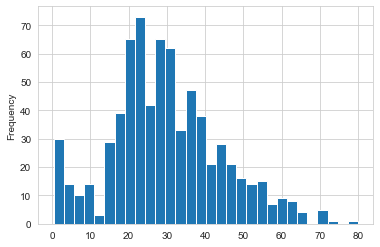

In [31]:
# another way to show histogram ->Pandas own Visulization

train["Age"].plot.hist(bins=30)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# Let's go ahead and explore that SibSP That was the number of siblings or spouses on board.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

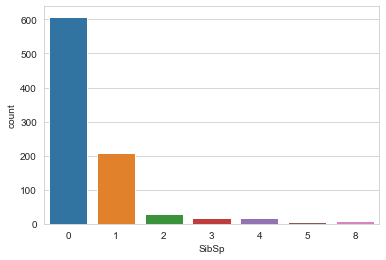

In [34]:
# sns.countplot(x="SibSp",data=train) ->set x equal to that column sibsp and tell seaborne my data
# that I'm going to use is that train data frame.

sns.countplot(x='SibSp',data=train)

In [35]:
# Now looking at this plot I can basically immediately tell that most people onboard did not have neither
#0-> children or a spouse on board.
#1->a spouse versus just having a single parent when children onboard.

#So those numbers pretty much make sense you have a lot of single people on board. They don't have a spouse and how many children are onboard.

<AxesSubplot:>

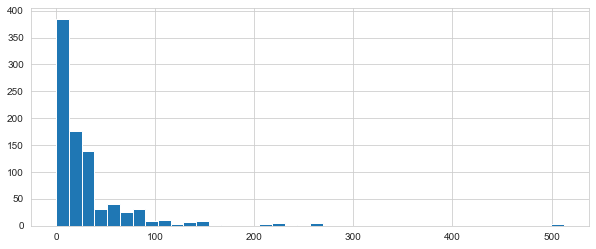

In [37]:
#Let's go ahead and take a look at how much people paid as a distribution.

train["Fare"].hist(bins=40,figsize=(10,4))

In [38]:
#Now it looks like most of the purchase prices are between 0 on a 50.
#So it makes sense that things are distributed towards the cheaper fare tickets because as you already
#seen most passengers are actually in the cheaper third class.

In [39]:
#OK let me go ahead and take a quick moment to show you an example of how we could have done this sort
#of plot with cufflinks in case you really like the interactive plots.

In [42]:
import cufflinks as cf

cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30)

In [ ]:
import sys
print(sys.executable)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

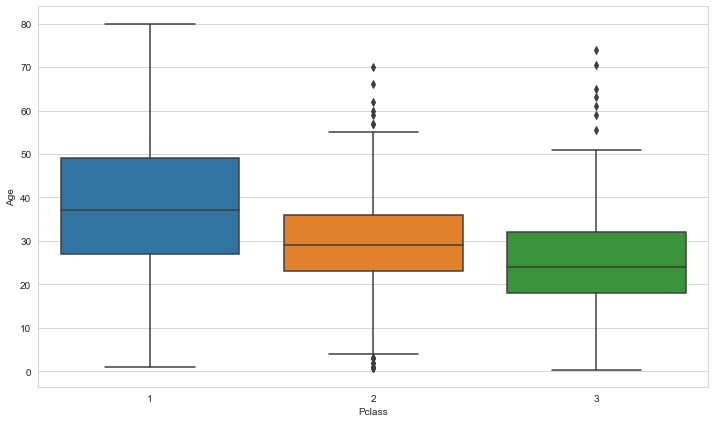

In [44]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
#We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
#We'll use these average age values to impute based on Pclass for Age.